<a href="https://colab.research.google.com/github/Smasko7/Machine-Learning-Course/blob/main/Exercise_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from yellowbrick.cluster import KElbowVisualizer


# 1. Load and prerpocess spotify tracks dataset

In [ ]:
df = pd.DataFrame(pd.read_csv('dataset.csv'))
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Drop columns ['Number', 'track_id', 'artists', 'album_name', 'track_name'] and make a new dataframe with those

In [ ]:
df.rename(columns={'Unnamed: 0': 'Number'}, inplace=True)

df_tracks = df[['Number', 'track_id', 'artists', 'album_name', 'track_name']]
df.drop(['Number', 'track_id', 'artists', 'album_name', 'track_name'], axis=1, inplace=True)

# Convert all True/False values to 1/0
df = df.replace({True: 1, False: 0})

df_tracks

/tmp/ipython-input-3510529814.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Number,track_id,artists,album_name,track_name
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On
...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends


## One hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['track_genre'], prefix='genre', dtype=int)

df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0,0,0,0,0,0,0,0,0,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0,0,0,0,0,0,0,0,0,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0,0,0,0,0,0,0,0,0,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0,0,0,0,0,0,0,0,0,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0,0,0,0,0,0,0,0,0,0


# 2. Scaling

## Z-Score (Standard) scaling

In [138]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,1.782627,0.024575,-0.305767,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
1,0.975633,-0.730859,-0.305767,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
2,1.065299,-0.160332,-0.305767,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
3,1.692961,-0.243214,-0.305767,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
4,2.186125,-0.271919,-0.305767,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072


## MinMax scaling [0, 1]

The Z-score normalization results in smooth elbow line, so there is no optimal k. Thus, we choose MinMax scaling.

In [139]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,0.73,0.044043,0.0,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.55,0.028566,0.0,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.57,0.040255,0.0,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.71,0.038557,0.0,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.82,0.037969,0.0,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# K-Means

For the given k values, we run the k-means algorithm each time with n_init = 10 runs with different centroid seeds per k. The elbow method is plotted.

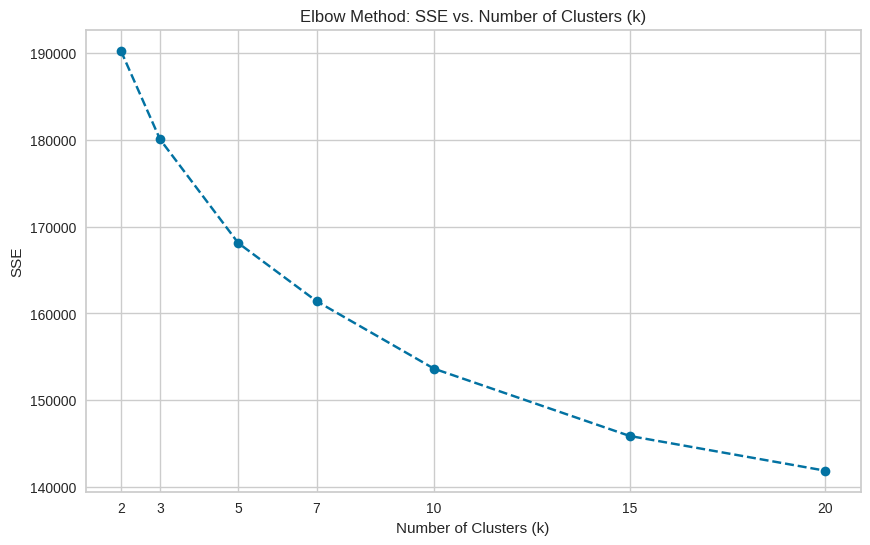

In [122]:
k_values = [2, 3, 5, 7, 10, 15, 20]
sse = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(df_scaled)
  sse.append(kmeans.inertia_) # SSE

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', linestyle='--', color='b')
plt.title('Elbow Method: SSE vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid(True)


# 4. Select k and find tracks' clusters

From the elbow plot above, we can observe that the SSE rapidly decreases until k=10 and then adding more clusters does not decrease SSE significantly. Thus, we select k=10 as an optimal number of clusters for our dataset.

In [123]:
# final model
optimal_k = 10
kmeans_final = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans_final.fit(df_scaled)

cluster_labels = kmeans_final.labels_

df_tracks['cluster'] = cluster_labels
df_tracks.head()

/tmp/ipython-input-759414365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks['cluster'] = cluster_labels


,Number,track_id,artists,album_name,track_name,cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,3
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,7
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1


# 5. Dominant genre for each cluster

Text(0, 0.5, 'Percentage (%)')

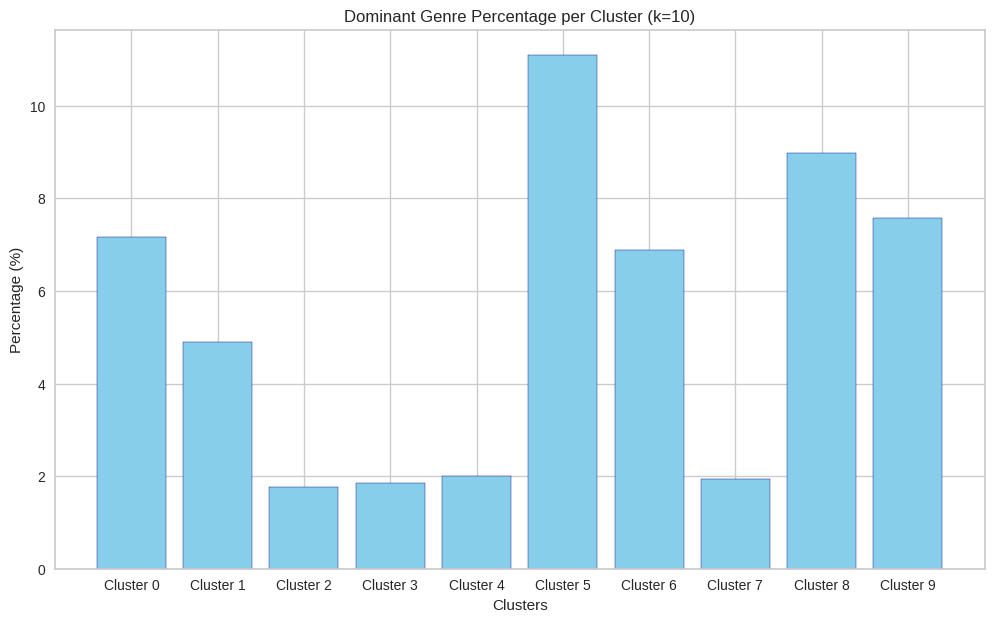

In [124]:
df_original = pd.DataFrame(pd.read_csv('dataset.csv'))

analysis_df = pd.DataFrame({
    'cluster': cluster_labels,
    'genre': df_original['track_genre']
})

cluster_summaries = []

for i in range(optimal_k):
    cluster_data = analysis_df[analysis_df['cluster'] == i]
    total_tracks = len(cluster_data)

    dominant_genre = cluster_data['genre'].mode()[0]
    dominant_genre_counts = len(cluster_data[cluster_data['genre'] == dominant_genre])
    percentage = (dominant_genre_counts / total_tracks) * 100

    cluster_summaries.append({
        'Cluster': f'Cluster {i}',
        'Dominant Genre': dominant_genre,
        'Percentage': percentage
    })

summary_df = pd.DataFrame(cluster_summaries)

plt.figure(figsize=(12, 7))
bars = plt.bar(summary_df['Cluster'], summary_df['Percentage'], color='skyblue', edgecolor='navy')

plt.title(f'Dominant Genre Percentage per Cluster (k={optimal_k})')
plt.xlabel('Clusters')
plt.ylabel('Percentage (%)')


In [125]:
summary_df

,Cluster,Dominant Genre,Percentage
0,Cluster 0,minimal-techno,7.170513
1,Cluster 1,honky-tonk,4.888302
2,Cluster 2,hardstyle,1.761317
3,Cluster 3,turkish,1.850714
4,Cluster 4,party,2.003962
5,Cluster 5,new-age,11.086112
6,Cluster 6,comedy,6.887862
7,Cluster 7,punk-rock,1.936963
8,Cluster 8,romance,8.970149
9,Cluster 9,minimal-techno,7.579372


# 6. Recommend similar songs to my favourite

My choice of track is 'Toxicity' from 'System Of A Down', which belongs to cluster number 4 --> 'party'. I am going to recommend 3 similar songs based on minimum euclidean distance in the cluster with 'Toxicity'.

In [132]:
target_song_name = 'Toxicity'
df_tracks.loc[df_tracks['track_name'] == target_song_name]

,Number,track_id,artists,album_name,track_name,cluster
3454,3454,0snQkGI5qnAmohLE7jTsTn,System Of A Down,Toxicity,Toxicity,4
71156,71156,0snQkGI5qnAmohLE7jTsTn,System Of A Down,Toxicity,Toxicity,4


The same track exists 2 times in the dataset (with the same track_id), because it is categorized in different track genre each time (alternative and metal).

In [129]:
df_original.loc[df_original['track_name'] == target_song_name][['track_id', 'track_name', 'track_genre']]

,track_id,track_name,track_genre
3454,0snQkGI5qnAmohLE7jTsTn,Toxicity,alternative
71156,0snQkGI5qnAmohLE7jTsTn,Toxicity,metal


### Recommender

In [130]:
def recommend_similar_songs(target_song_name, df_tracks, df_scaled, dist='euclidean'):

  target_idx = df_tracks[df_tracks['track_name'] == target_song_name].index[0]
  print(f"Index of '{target_song_name}' track is: {target_idx}")

  target_cluster = df_tracks.loc[target_idx, 'cluster']
  print(f"Target Cluster is: {target_cluster}")

  target_features = df_scaled.loc[[target_idx]]

  cluster_indices = df_tracks[df_tracks['cluster'] == target_cluster].index
  cluster_features = df_scaled.loc[cluster_indices]

  if dist == 'cosine_sim':
    # cosine_distance = (1 - Cosine Similarity)
    dists = cosine_distances(target_features, cluster_features)[0]
  else:
    dists = euclidean_distances(target_features, cluster_features)[0]

  dist_series = pd.Series(dists, index=cluster_indices).sort_values()

  recommendations_idx = dist_series.iloc[1:4].index

  recommendations = df_tracks.loc[recommendations_idx, ['track_name', 'artists']]
  return recommendations



recommendations = recommend_similar_songs(target_song_name, df_tracks, df_scaled)
print(f"For track '{target_song_name}', the recommended tracks are: ")
print(recommendations)

Index of 'Toxicity' track is: 3454
Target Cluster is: 4
For track 'Toxicity', the recommended tracks are: 
           track_name                   artists
3262  One Step Closer               Linkin Park
3752             ポラリス              BLUE ENCOUNT
3651         MUKANJYO  Survive Said The Prophet


The similar songs that are recommended are:
1. One Step Closer from Linkin Park
2. ポラリス from BLUE ENCOUNT
3. MUKANJYO from Survive Said The Prophet

I believe that they are indeed somehow similar to 'Toxicity' and I like them too. To be honest, 'One step Closer' is also one of my favourites!

# 7. Use Similarity distance to recommend similar songs

In [140]:
recommendations = recommend_similar_songs(target_song_name, df_tracks, df_scaled, dist='cosine_sim')
print(f"For track '{target_song_name}', the recommended tracks (with cosine distance) are: ")
print(recommendations)

Index of 'Toxicity' track is: 3454
Target Cluster is: 4
For track 'Toxicity', the recommended tracks (with cosine distance) are: 
           track_name       artists
3262  One Step Closer   Linkin Park
3354  Everybody Talks    Neon Trees
3752             ポラリス  BLUE ENCOUNT


We can see that even with cosine distance, we get the exact same recommendations.

# 8. Repeat the recommendation procedure with the elbow method

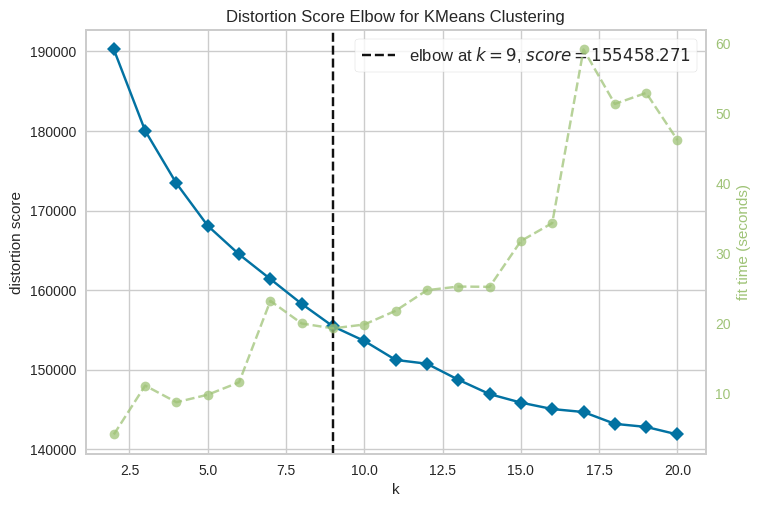

The optimal number of clusters identified by elbow method is: 9


In [134]:
model = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(model, k=(2, 21), timings=True)

visualizer.fit(df_scaled)
visualizer.show()

optimal_k = visualizer.elbow_value_
print(f"The optimal number of clusters identified by elbow method is: {optimal_k}")

The optimal k with KElbowVisualizer for k from 2 to 20, is:
k = 9, which is pretty close to the optimal k with guessed before (10)

Text(0, 0.5, 'Percentage (%)')

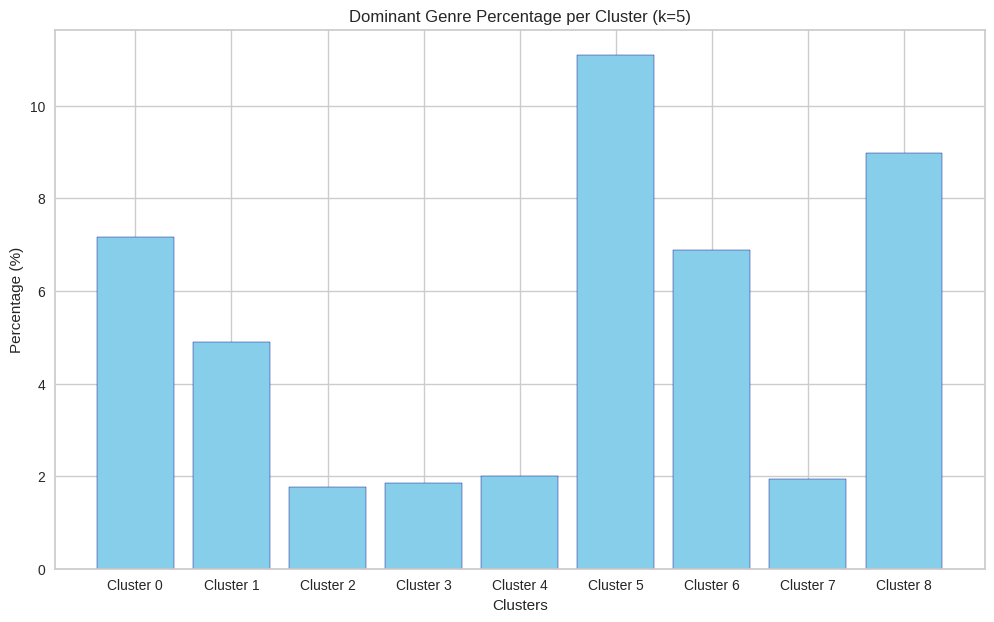

In [135]:
df_original = pd.DataFrame(pd.read_csv('dataset.csv'))

analysis_df = pd.DataFrame({
    'cluster': cluster_labels,
    'genre': df_original['track_genre']
})

cluster_summaries = []

for i in range(optimal_k):
    cluster_data = analysis_df[analysis_df['cluster'] == i]
    total_tracks = len(cluster_data)

    dominant_genre = cluster_data['genre'].mode()[0]
    dominant_genre_counts = len(cluster_data[cluster_data['genre'] == dominant_genre])
    percentage = (dominant_genre_counts / total_tracks) * 100

    cluster_summaries.append({
        'Cluster': f'Cluster {i}',
        'Dominant Genre': dominant_genre,
        'Percentage': percentage
    })

summary_df = pd.DataFrame(cluster_summaries)

plt.figure(figsize=(12, 7))
bars = plt.bar(summary_df['Cluster'], summary_df['Percentage'], color='skyblue', edgecolor='navy')

plt.title('Dominant Genre Percentage per Cluster (k=5)')
plt.xlabel('Clusters')
plt.ylabel('Percentage (%)')


In [136]:
summary_df

,Cluster,Dominant Genre,Percentage
0,Cluster 0,minimal-techno,7.170513
1,Cluster 1,honky-tonk,4.888302
2,Cluster 2,hardstyle,1.761317
3,Cluster 3,turkish,1.850714
4,Cluster 4,party,2.003962
5,Cluster 5,new-age,11.086112
6,Cluster 6,comedy,6.887862
7,Cluster 7,punk-rock,1.936963
8,Cluster 8,romance,8.970149


In [137]:
recommendations = recommend_similar_songs(target_song_name, df_tracks, df_scaled)
print(f"For track '{target_song_name}', the recommended tracks are: ")
print(recommendations)

Index of 'Toxicity' track is: 3454
Target Cluster is: 4
For track 'Toxicity', the recommended tracks are: 
           track_name                   artists
3262  One Step Closer               Linkin Park
3752             ポラリス              BLUE ENCOUNT
3651         MUKANJYO  Survive Said The Prophet


We can see that the recommendations are the same once again.

# 9. HDBSCAN

In [141]:
hdb = HDBSCAN()

hdb_labels = hdb.fit_predict(df_scaled)

print(set(hdb_labels))

if -1 in hdb_labels:
  n_clusters_hdb = len(set(hdb_labels)) - 1
else:
  n_clusters_hdb = len(set(hdb_labels))

print(f"Number of clusters found by HDBSCAN: {n_clusters_hdb}")


{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), n

The number of clusters that the default HDBSCAN algorithm produces (1514) is way bigger than the k-means elbow method. This happens because the default min_cluster_size value is 5 and the dataset has 114000 points, so with a minimum size of only 5, HDBSCAN is finding every tiny collection of 5-10 songs that are slightly similar and calling them a cluster. This could be "fixed" with some finetuning on the HDBSCAN function's parameters.

In [142]:
hdb = HDBSCAN(min_cluster_size = 100)

hdb_labels = hdb.fit_predict(df_scaled)

print(set(hdb_labels))

if -1 in hdb_labels:
  n_clusters_hdb = len(set(hdb_labels)) - 1
else:
  n_clusters_hdb = len(set(hdb_labels))

print(f"Number of clusters found by HDBSCAN: {n_clusters_hdb}")

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), n